In [56]:
import pandas as pd
from kaggle_connector import KaggleConnector

# Initialize the connector - it will automatically load credentials from .env
connector = KaggleConnector()

# Let the connector download and load the dataset automatically
df = connector.load_online_retail()

# Display the first few rows
df.head()



Dataset URL: https://www.kaggle.com/datasets/vijayuv/onlineretail


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [57]:
# Add new datasets to dataframe

import pandas as pd

# Create additional columns to the dataframe from the original dataset
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['InvoiceYear'] = df['InvoiceDate'].map(lambda date: date.year)
df['InvoiceMonth'] = df['InvoiceDate'].map(lambda date: date.month)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['CustomerID'] = df['CustomerID'].astype('Int64')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,InvoiceYear,InvoiceMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,201012,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,201012,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,201012,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,201012,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,201012,2010,12,20.34


In [58]:
# Check to see how the dataset is distributed based on the column names, their type, how many unique values, total records, missing values and % of missing values
def dataset_details(dataset):
    feature = []
    dtype = []
    unique =[]
    count = []
    missing_values=[]
    missing_percentage = []
    
    for column in df.columns :
        feature.append(column)
        dtype.append(df[column].dtype)
        unique.append(df[column].unique())
        count.append(len(df[column]))
        missing_values.append(df[column].isnull().sum())
        missing_percentage.append(round((df[column].isnull().sum()/len(df))*100 , 2))
        
        
    details = pd.DataFrame({
        'Feature' : feature , 
        'Type' : dtype , 
        'Count' : count , 
        'Unique' : unique , 
        "Missed Values" : missing_values,
        'Missed Percent%' : missing_percentage,
       
    })
    
    return details

In [59]:
dataset_details(df)

,Feature,Type,Count,Unique,Missed Values,Missed Percent%
0,InvoiceNo,object,541909,"[536365, 536366, 536367, 536368, 536369, 53637...",0,0.00
1,StockCode,object,541909,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,...",0,0.00
2,Description,object,541909,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",1454,0.27
3,Quantity,int64,541909,"[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80...",0,0.00
4,InvoiceDate,datetime64[ns],541909,"[2010-12-01 08:26:00, 2010-12-01 08:28:00, 201...",0,0.00
5,UnitPrice,float64,541909,"[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1...",0,0.00
6,CustomerID,Int64,541909,"[17850, 13047, 12583, 13748, 15100, 15291, 146...",135080,24.93
7,Country,object,541909,"[United Kingdom, France, Australia, Netherland...",0,0.00
8,InvoiceYearMonth,int64,541909,"[201012, 201101, 201102, 201103, 201104, 20110...",0,0.00
9,InvoiceYear,int64,541909,"[2010, 2011]",0,0.00


In [60]:
# Determine the StockCode that has the top 10 highest average quantity ordered across all the countries in Pandas
def get_top_10_stocks_by_avg_quantity(df):
    """Calculate average quantity per stock across countries."""
    return (df.groupby('StockCode')['Quantity']
            .mean()
            .sort_values(ascending=False)
            .head(10))

get_top_10_stocks_by_avg_quantity(df)

StockCode
47556B    957.750000
84826     359.078947
16014     246.814815
79063D    211.538462
79062D    202.400000
23001     200.000000
16033     192.000000
17084R    149.333333
22053     146.310345
84077      99.348708
Name: Quantity, dtype: float64

In [61]:
#Determine which StockCode that has the top 10 highest unit prices  
def get_null_descript_by_stock_code(df):
    df_null_descript_by_stock_code = df.groupby('StockCode')['UnitPrice'].max().sort_values(ascending=False)
    print(df_null_descript_by_stock_code.head(10))

get_null_descript_by_stock_code(df)

StockCode
M               38970.00
AMAZONFEE       17836.46
B               11062.06
POST             8142.75
DOT              4505.17
D                1867.86
CRUK             1100.44
BANK CHARGES     1050.15
22502             649.50
S                 570.00
Name: UnitPrice, dtype: float64


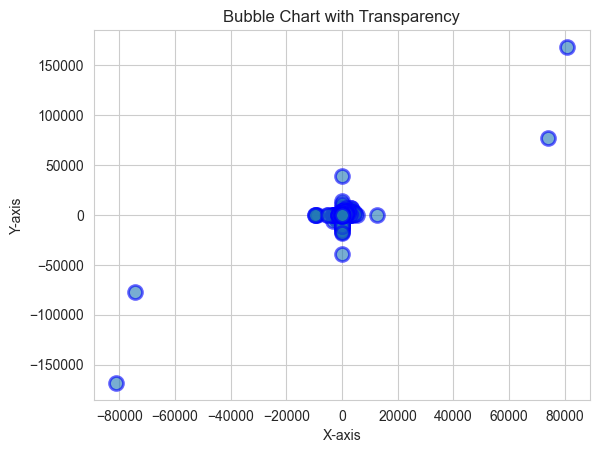

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')



# 'Revenue'   'Units_Sold', 'Revenue'
# plt.figure(figsize=(20,5))
# sns.lineplot(data=df,y='Revenue',x='Quantity',color = 'black')
# plt.xlabel('Revenue')
# plt.ylabel('Quantity')


plt.scatter(df['Quantity'], df['Revenue'], s=100, alpha=0.6, edgecolors='b', linewidths=2)
# plt.scatter(x_values, y_values, s=bubble_sizes, alpha=0.6, edgecolors='b', linewidths=2)
plt.title("Bubble Chart with Transparency")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

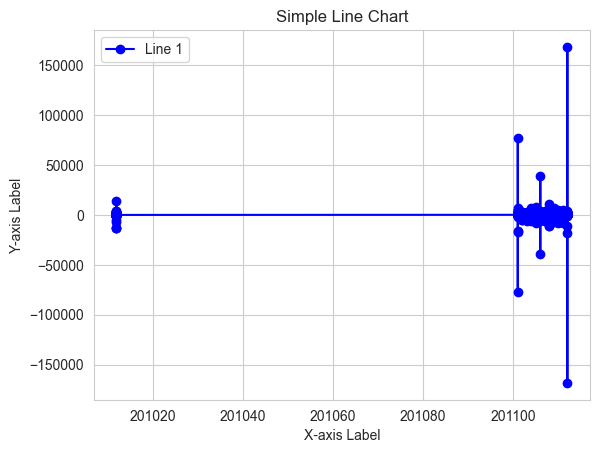

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

plt.plot(df['InvoiceYearMonth'], df['Revenue'], marker='o', linestyle='-', color='b', label='Line 1')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Chart')

# Add a legend
plt.legend()

# Display the chart
plt.show()

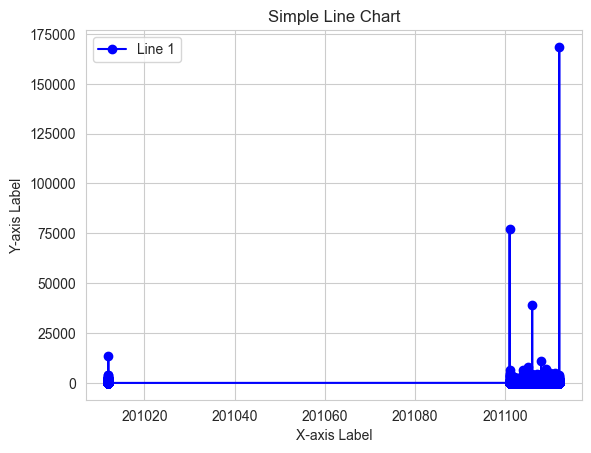

In [64]:
#Filter out any revenue that is less than or equal to 0
df_non_negative_rev = df[df['Revenue'] >= 0]


plt.plot(df_non_negative_rev['InvoiceYearMonth'], df_non_negative_rev['Revenue'], marker='o', linestyle='-', color='b', label='Line 1')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Chart')

# Add a legend
plt.legend()

# Display the chart
plt.show()


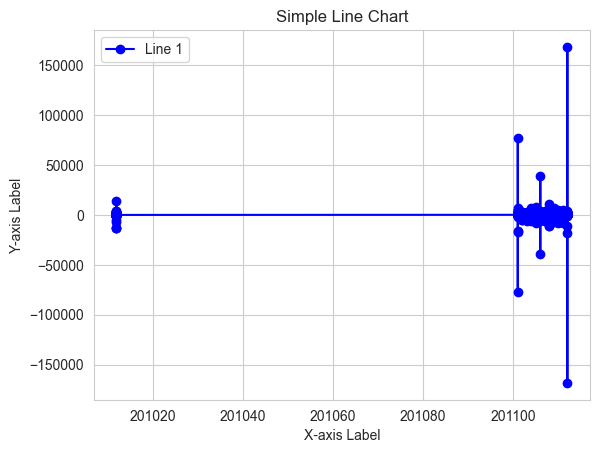

In [65]:
#Remove any month from the chart that doesn't have any revenue

df_rev_not_nill = df[df['Revenue'] != 0]

plt.plot(df_rev_not_nill['InvoiceYearMonth'], df_rev_not_nill['Revenue'], marker='o', linestyle='-', color='b', label='Line 1')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Chart')

# Add a legend
plt.legend()

# Display the chart
plt.show()



In [69]:
#Lets look at one month in particular - January 2011

# df_month_201101 = df[df['InvoiceYearMonth'] == '201101']

def get_highest_revenue_per_country(df):
    df_country_highest_rev = df.groupby(['Country','InvoiceYearMonth'])['Revenue'].sum().sort_values(ascending=False)
    print(df_country_highest_rev.head(10))

get_highest_revenue_per_country(df)

Country         InvoiceYearMonth
United Kingdom  201111              1282805.780
                201110               877438.190
                201109               862018.152
                201012               676742.620
                201105               596459.860
                201107               565479.841
                201103               559707.390
                201106               554478.350
                201108               539130.500
                201104               442254.041
Name: Revenue, dtype: float64
